# Simple Use of K Nearest Neighbors Classifier

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix

### Getting Data

In [2]:
data = [
    (10, 30, 'red'), (30, 40, 'red'), (30, 50, 'red'),
    (10, 30, 'red'), (20, 50, 'red'), (10, 40, 'red'),
    (40, 60, 'red'), (50, 65, 'red'),
    (55, 40, 'green'),
    (70, 80, 'green'), (70, 90, 'green'), (60, 70, 'green'),
    (50, 90, 'green'), (60, 75, 'green'), (70, 95, 'green'),
]

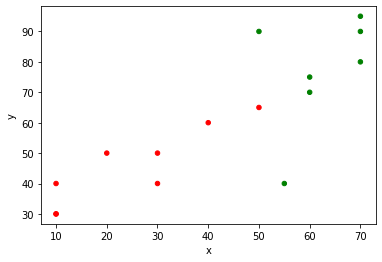

In [3]:
df = pd.DataFrame(data=data, columns=['x', 'y', 'label'])
df.plot.scatter('x', 'y', c='label')
plt.show()

### Modeling

In [4]:
X = df.iloc[:, :2].values
y = df.iloc[:, -1].apply(lambda x: 1 if x == 'red' else 0).values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [5]:
model = KNeighborsClassifier(6)
model.fit(X, y)
model.score(X, y)

0.8666666666666667

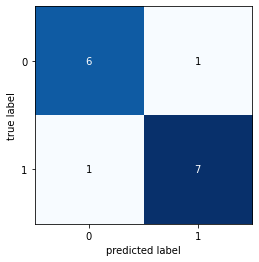

In [6]:
plot_confusion_matrix(confusion_matrix(y, model.predict(X)))
plt.show()

In [7]:
def knn_comparison(X, y, k, ax=None):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)
    # Plotting decision region
    ax = plot_decision_regions(X, y, clf=clf, legend=2, ax=ax)
    # Adding axes annotations
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Knn with K=' + str(k))

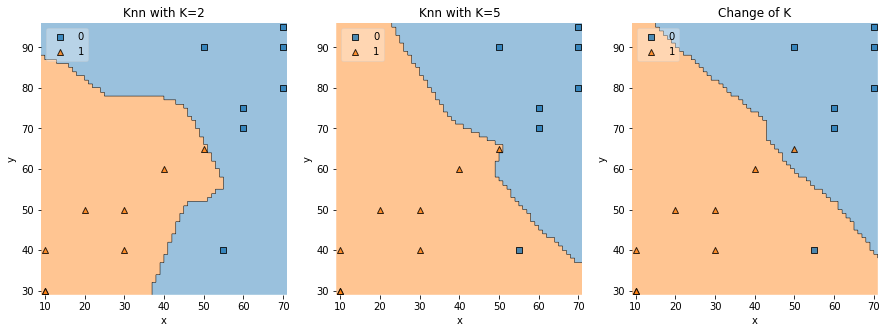

In [8]:
fig = plt.figure(1, figsize=(15, 5))

for i, k in enumerate([2, 5, 9]):
    ax = fig.add_subplot(1, 3, i+1)
    ax = knn_comparison(X, y, k=k, ax=ax)

plt.title('Change of K')
plt.show()